In [1]:
import os

In [2]:
%pwd

'D:\\Desktop\\Deep Learning\\Lab 7\\Deep-Learning-Model-Customization-and-Performance-Evaluation\\Research\\Cifar10'

In [3]:
os.chdir("../")
os.chdir("../")

In [4]:
%pwd

'D:\\Desktop\\Deep Learning\\Lab 7\\Deep-Learning-Model-Customization-and-Performance-Evaluation'

In [5]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [6]:
import logging
from pathlib import Path
logging.basicConfig(
    # filename='extract_data.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [7]:
print(Path(os.getcwd()))

D:\Desktop\Deep Learning\Lab 7\Deep-Learning-Model-Customization-and-Performance-Evaluation


In [8]:
import warnings

# Disable specific TensorFlow and Keras warnings
warnings.filterwarnings("ignore", message="From .*: The name tf.get_default_graph is deprecated.")
warnings.filterwarnings("ignore", message="From .*: The name tf.train.Optimizer is deprecated.")
warnings.filterwarnings("ignore", message="From .*: The name tf.ragged.RaggedTensorValue is deprecated.")
warnings.filterwarnings("ignore", message="From .*: The name tf.executing_eagerly_outside_functions is deprecated.")

In [9]:
# import logging
# import os
# import time
# from dataclasses import dataclass
# from pathlib import Path
# import numpy as np
# import pandas as pd
# import tensorflow as tf

# from tensorflow.keras.applications import VGG16, VGG19, ResNet50
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# import pandas as pd

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow_addons.metrics import F1Score
# from joblib import dump
# import matplotlib.pyplot as plt

# # Configure logging
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# # Your existing ExperimentConfig and ConfigurationManager classes go here
# @dataclass(frozen=True)
# class ExperimentConfig:
#     root_dir: Path
#     X_train_file: Path
#     y_train_file: Path
#     X_test_file: Path
#     y_test_file: Path
#     experiment_results_dir: Path
#     log_file: Path  
#     scaler_file: Path
#     label_encoder_file: Path

# class ConfigurationManager:
#     def __init__(self):
#         self.root_dir = Path(os.getcwd())
#         self.X_train_file = self.root_dir / "Dataset/Modeltraining/Cifar10/X_train.npy"
#         self.y_train_file = self.root_dir / "Dataset/Modeltraining/Cifar10/y_train.npy"
#         self.X_test_file = self.root_dir / "Dataset/Modeltraining/Cifar10/X_test.npy"
#         self.y_test_file = self.root_dir / "Dataset/Modeltraining/Cifar10/y_test.npy"
#         self.experiment_results_dir = self.root_dir / "ModelExperiments/Cifar10"
#         self.log_file = self.experiment_results_dir / "experiment_log.txt"
        
#         # Update the paths below to ensure they point to valid directories
#         self.scaler_file = self.experiment_results_dir / "scaler.pkl"  # Adjusted path
#         self.label_encoder_file = self.experiment_results_dir / "label_encoder.pkl"  # Adjusted path

#         # Ensure the directories exist
#         os.makedirs(self.experiment_results_dir, exist_ok=True)

#     def get_experiment_config(self) -> ExperimentConfig:
#         return ExperimentConfig(
#             root_dir=self.root_dir,
#             X_train_file=self.X_train_file,
#             y_train_file=self.y_train_file,
#             X_test_file=self.X_test_file,
#             y_test_file=self.y_test_file,
#             experiment_results_dir=self.experiment_results_dir,
#             log_file=self.log_file,
#                         scaler_file=self.scaler_file,
#             label_encoder_file=self.label_encoder_file
            
#         )


# class ExperimentRunner:
#     def __init__(self, config: ExperimentConfig):
#         self.config = config
#         if not self.config.experiment_results_dir.exists():
#             self.config.experiment_results_dir.mkdir(parents=True)
            
#     def add_pretrained_model_top(self,model_base, num_classes):
#         x = model_base.output
#         x = GlobalAveragePooling2D()(x)
#         x = Dense(1024, activation='relu')(x)
#         predictions = Dense(num_classes, activation='softmax')(x)
#         model = Model(inputs=model_base.input, outputs=predictions)
#         return model
    
#     # Assume alexnet and googlenet functions are implemented elsewhere in your script
#     # For the sake of example, they would be defined similar to the existing models
    
#     # def prepare_model(self,model_name, input_shape=(32, 32, 3), num_classes=10):
#     #     if model_name in ['VGG16', 'VGG19', 'ResNet50']:
#     #         # Use existing code to prepare these models
#     #         base_model = {
#     #             'VGG16': VGG16,
#     #             'VGG19': VGG19,
#     #             'ResNet50': ResNet50
#     #         }[model_name](weights='imagenet', include_top=False, input_shape=input_shape)
#     #         model = ExperimentRunner.add_pretrained_model_top(base_model, num_classes)
#     #     elif model_name == 'AlexNet':
#     #         model = alexnet(input_shape=input_shape, num_classes=num_classes)
#     #     elif model_name == 'GoogLeNet':
#     #         model = googlenet(input_shape=input_shape, num_classes=num_classes)
#     #     else:
#     #         raise ValueError(f"Model {model_name} not supported")

#     #     model.compile(optimizer=Adam(learning_rate=0.0001),
#     #                           loss='sparse_categorical_crossentropy',
#     #                           metrics=['accuracy', F1Score(num_classes=num_classes, average='macro')])
#     #     return model

#     def prepare_model(self,model_name,input_shape, num_classes=10):
#         base_model = {
#             'VGG16': VGG16,
#             'VGG19': VGG19,
#             'ResNet50': ResNet50
#         }[model_name](weights='imagenet', include_top=False, input_shape=input_shape)
        
#         model = self.add_pretrained_model_top(base_model, num_classes)
#         model.compile(optimizer=Adam(learning_rate=0.0001),
#                       loss='sparse_categorical_crossentropy',
#                       metrics=['accuracy', F1Score(num_classes=num_classes, average='macro')])
#         return model


#     def run_experiments(self):
#         # Use the status file to write validation details
#         with open(self.config.log_file, 'w', encoding='utf-8') as f:
#             f.write("Starting experiments...\n")
#             logging.info("Starting experiments...\n")
#             # Load data
            
#             X_train = np.load(self.config.X_train_file)
#             y_train = np.load(self.config.y_train_file)
#             X_test = np.load(self.config.X_test_file)
#             y_test = np.load(self.config.y_test_file)
#             f.write("Loaded data...\n")
#             logging.info("Loaded data...\n")            


#             # Normalize pixel values to be between 0 and 1
#             X_train, X_test = X_train / 255.0, X_test / 255.0
        
#             # It's common to just subtract the mean image from all training examples and divide by the std
#             # But for simplicity, we are just scaling to [0, 1] 

#             # Ensure labels are encoded starting from 0
#             label_encoder = LabelEncoder()
#             y_train_encoded = label_encoder.fit_transform(y_train)
#             y_test_encoded = label_encoder.transform(y_test)  # Transform test labels with the same encoder
            
#             # Save the label encoder for later use
#             dump(label_encoder, self.config.label_encoder_file)
#             logging.info(f"Label Encoder saved to {self.config.label_encoder_file}")

#             # Log the mapping of original labels to encoded labels
#             label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
#             f.write(f"Label Encoding Mapping: {label_mapping}\n")
#             logging.info(f"Label Encoding Mapping: {label_mapping}\n")

#             # Check unique labels to ensure they are in the range [0, n_classes-1]
#             unique_labels = np.unique(y_train_encoded)
#             f.write(f"Unique labels after encoding: {unique_labels}\n")
#             logging.info(f"Unique labels after encoding: {unique_labels}\n")


#             logging.info(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
#             logging.info(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

#             # model_names = ['VGG16', 'VGG19', 'ResNet50', 'AlexNet', 'GoogLeNet']  # Include your custom models
#             model_names = ['VGG16', 'VGG19', 'ResNet50']  # Include your custom models
#             results = []
        
#             for model_name in model_names:
#                 model = self.prepare_model(model_name, input_shape=(32, 32, 3), num_classes=10)
#                 # Now use run_experiment to train and evaluate this model
#                 result = self.run_experiment(model, model_name, X_train, y_train_encoded, X_test, y_test_encoded, epochs=10,file=f)
#                 results.append(result)
        
#             # Save results to an Excel file
#             df_results = pd.DataFrame(results, columns=['Model Name', 'Accuracy', 'F1 Score', 'Training Time', 'Inference Time'])
#             df_results.to_excel(self.config.experiment_results_dir / "model_performance.xlsx", index=False)

#             f.write("Experiments completed.\n")

    

#     def run_experiment(self, model, model_name, X_train, y_train, X_test, y_test, epochs,file):
#         file.write(f"Running experiment with model_name: {model_name},Epochs: {epochs}\n")
#         logging.info(f"Running experiment with model_name: {model_name},Epochs: {epochs}\n")
    
#         unique_labels = len(np.unique(y_train))  # Define unique_labels based on y_train within the method
    
#         model = model
    
#         logging.info(model.summary())
#         file.write(str(model.summary()))
    
#         start_time = time.time()
#         history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
#         training_time = time.time() - start_tim
    
#         # Plotting training/validation loss, accuracy, and F1 score
#         plt.figure(figsize=(8, 16))
    
#         # Plot Training and Validation Loss
#         plt.subplot(3, 1, 1)
#         plt.plot(history.history['loss'], label='Training Loss')
#         plt.plot(history.history['val_loss'], label='Validation Loss')
#         plt.xlabel('Epoch')
#         plt.ylabel('Loss')
#         plt.title('Training and Validation Loss')
#         plt.legend()
    
#         # Plot Training and Validation Accuracy
#         plt.subplot(3, 1, 2)
#         plt.plot(history.history['accuracy'], label='Training Accuracy')
#         plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#         plt.xlabel('Epoch')
#         plt.ylabel('Accuracy')
#         plt.title('Training and Validation Accuracy')
#         plt.legend()
    
#         # Plot Training and Validation F1 Score
#         plt.subplot(3, 1, 3)
#         plt.plot(history.history['f1_score'], label='Training F1 Score')
#         plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
#         plt.xlabel('Epoch')
#         plt.ylabel('F1 Score')
#         plt.title('Training and Validation F1 Score')
#         plt.legend()
    
#         plt.tight_layout()
#         plt.show()
        
#         # Evaluate the model to get the F1 score along with loss and accuracy
#         test_loss, test_acc, test_f1 = model.evaluate(X_test, y_test, verbose=1)
        
#         inference_start_time = time.time()
#         _ = model.predict(X_test[:1])  # Measure inference time for a single sample
#         inference_time = time.time() - inference_start_time
    
#         file.write(f"model_name: {model_name}, Epochs: {epochs}, Test Accuracy: {test_acc}, F1 Score: {test_f1.result().numpy()}, Training Time: {training_time}s\n")
#         logging.info(f"model_name: {model_name}, Layers: {layer_count}, Epochs: {epochs}, Test Accuracy: {test_acc}, F1 Score: {test_f1.result().numpy()}, Training Time: {training_time}s\n")
    
#         # Save the model
#         model_save_path = str(self.config.experiment_results_dir / f"model_name: {model_name}_epochs_{epochs}.keras")
#         model.save(model_save_path)
#         file.write(f"Model saved to {model_save_path}\n")
#         logging.info(f"Model saved to {model_save_path}\n")
#         # Return a dictionary or tuple of the results you want to record

        
#         return model_name, test_acc, test_f1.result().numpy(), training_time, inference_time


# # Your main function goes here
# def main():
#     try:
#         logging.info("Starting the program...")
#         config_manager = ConfigurationManager()
#         experiment_config = config_manager.get_experiment_config()
#         experiment_runner = ExperimentRunner(experiment_config)

#         experiment_runner.run_experiments()
#         logging.info("Program completed successfully.")
#     except Exception as e:
#         logging.error(f"Error occurred: {e}", exc_info=True)
#         raise

# if __name__ == "__main__":
#     main()


2024-04-08 21:18:32 - INFO - Starting experiments...

2024-04-08 21:18:32 - INFO - Loaded data...

2024-04-08 21:18:33 - INFO - Label Encoder saved to D:\Desktop\Deep Learning\Lab 7\Deep-Learning-Model-Customization-and-Performance-Evaluation\ModelExperiments\Cifar10\label_encoder.pkl
2024-04-08 21:18:33 - INFO - Label Encoding Mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

2024-04-08 21:18:33 - INFO - Unique labels after encoding: 10

2024-04-08 21:18:33 - INFO - X_train shape: (48000, 32, 32, 3), y_train shape: (48000,)
2024-04-08 21:18:33 - INFO - X_test shape: (12000, 32, 32, 3), y_test shape: (12000,)
2024-04-08 21:18:33 - INFO - Running experiment with model_name: VGG16, Epochs: 2



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

2024-04-08 21:18:33 - INFO - None


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

2024-04-08 21:36:38 - INFO - Test Accuracy for VGG16: 0.09991666674613953
2024-04-08 21:36:38 - INFO - Test F1 Score for VGG16: 3.197333335876465
2024-04-08 21:36:38 - INFO - Training Time for VGG16: 1053.4981462955475 seconds
2024-04-08 21:36:38 - INFO - Inference Time for VGG16: 30.98179292678833 seconds


80134624/80134624 [==============================] - 44s 1us/step


2024-04-08 21:37:23 - INFO - Running experiment with model_name: VGG19, Epochs: 2



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

2024-04-08 21:37:23 - INFO - None


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

2024-04-08 22:02:35 - INFO - Test Accuracy for VGG19: 0.09775000065565109
2024-04-08 22:02:35 - INFO - Test F1 Score for VGG19: 3.128000020980835
2024-04-08 22:02:35 - INFO - Training Time for VGG19: 1460.1527841091156 seconds
2024-04-08 22:02:35 - INFO - Inference Time for VGG19: 51.1594603061676 seconds


94765736/94765736 [==============================] - 78s 1us/step


2024-04-08 22:03:56 - INFO - Running experiment with model_name: ResNet50, Epochs: 2



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

2024-04-08 22:03:56 - INFO - None


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

2024-04-08 22:24:26 - INFO - Test Accuracy for ResNet50: 0.6660000085830688
2024-04-08 22:24:26 - INFO - Test F1 Score for ResNet50: 3.748500108718872
2024-04-08 22:24:26 - INFO - Training Time for ResNet50: 1184.4880154132843 seconds
2024-04-08 22:24:26 - INFO - Inference Time for ResNet50: 44.339656591415405 seconds


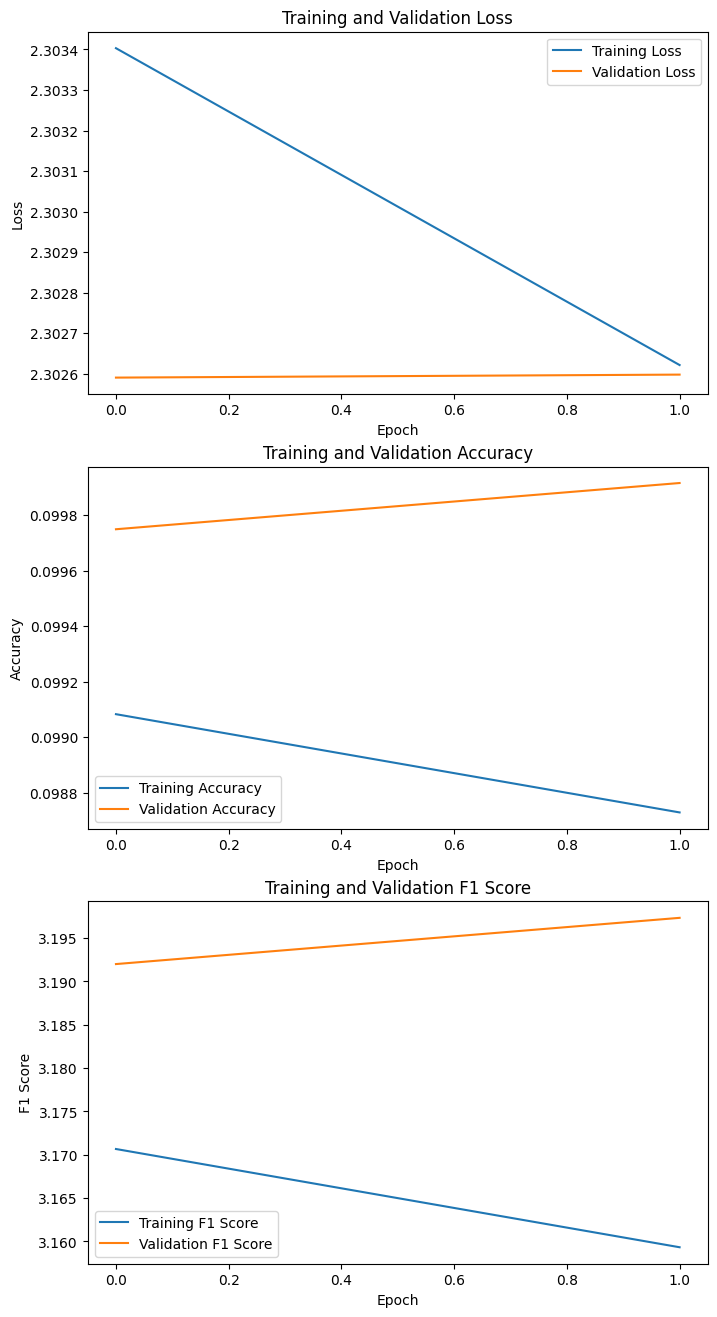

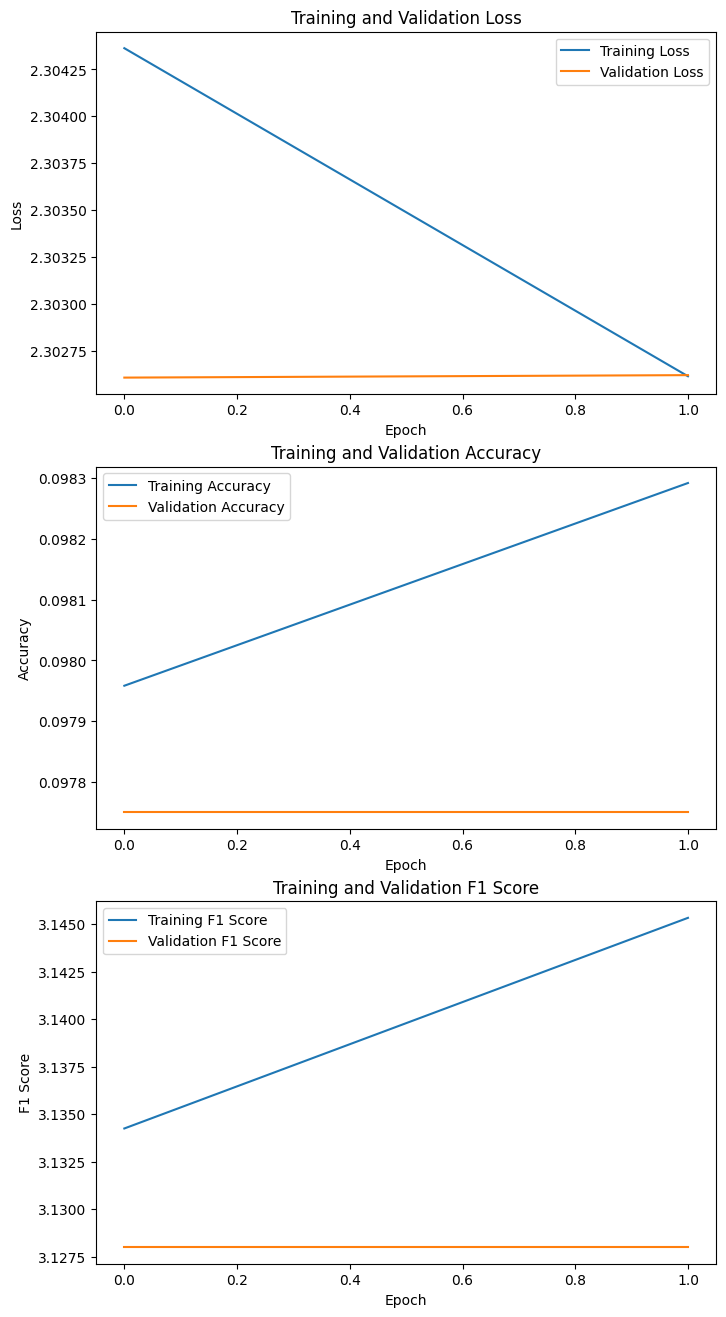

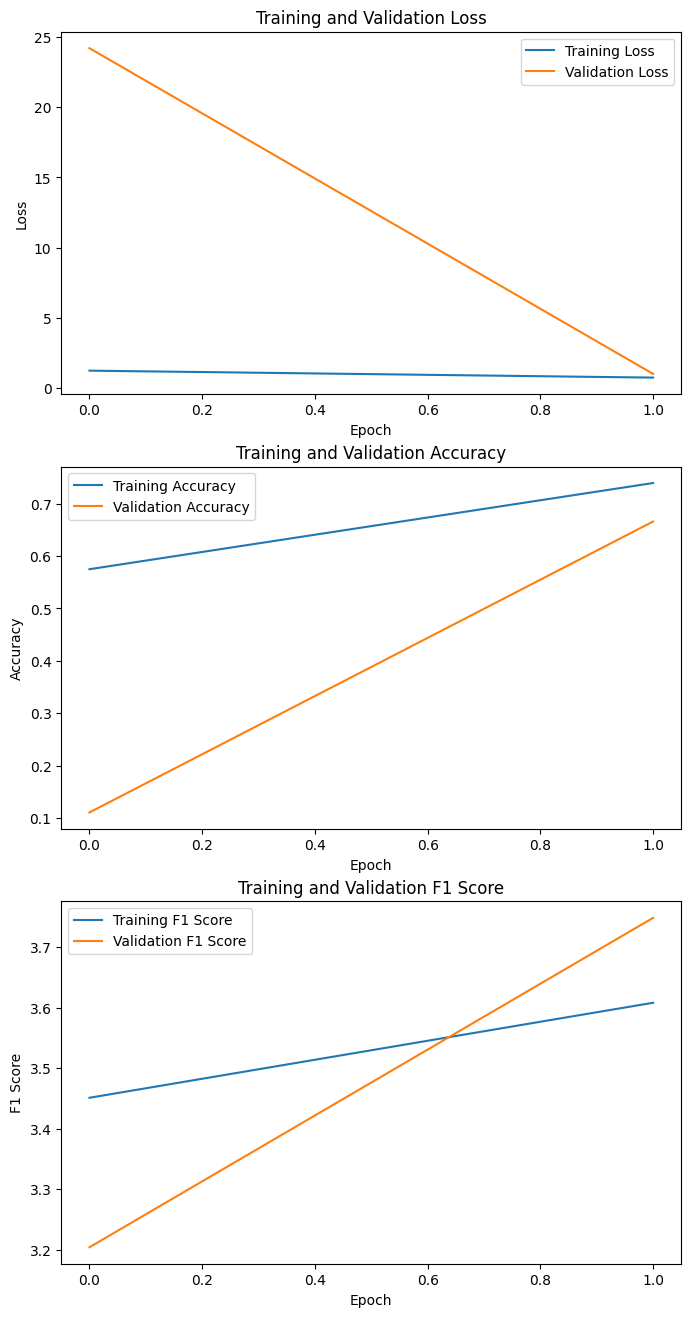

In [11]:
import logging
import os
import time
from dataclasses import dataclass
from pathlib import Path
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from joblib import dump
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define ExperimentConfig and ConfigurationManager classes
@dataclass(frozen=True)
class ExperimentConfig:
    root_dir: Path
    X_train_file: Path
    y_train_file: Path
    X_test_file: Path
    y_test_file: Path
    experiment_results_dir: Path
    log_file: Path
    scaler_file: Path
    label_encoder_file: Path

class ConfigurationManager:
    def __init__(self):
        self.root_dir = Path(os.getcwd())
        self.X_train_file = self.root_dir / "Dataset/Modeltraining/Cifar10/X_train.npy"
        self.y_train_file = self.root_dir / "Dataset/Modeltraining/Cifar10/y_train.npy"
        self.X_test_file = self.root_dir / "Dataset/Modeltraining/Cifar10/X_test.npy"
        self.y_test_file = self.root_dir / "Dataset/Modeltraining/Cifar10/y_test.npy"
        self.experiment_results_dir = self.root_dir / "ModelExperiments/Cifar10"
        self.log_file = self.experiment_results_dir / "experiment_log.txt"
        self.scaler_file = self.experiment_results_dir / "scaler.pkl"
        self.label_encoder_file = self.experiment_results_dir / "label_encoder.pkl"
        os.makedirs(self.experiment_results_dir, exist_ok=True)

    def get_experiment_config(self) -> ExperimentConfig:
        return ExperimentConfig(
            root_dir=self.root_dir,
            X_train_file=self.X_train_file,
            y_train_file=self.y_train_file,
            X_test_file=self.X_test_file,
            y_test_file=self.y_test_file,
            experiment_results_dir=self.experiment_results_dir,
            log_file=self.log_file,
            scaler_file=self.scaler_file,
            label_encoder_file=self.label_encoder_file
        )

class SparseCategoricalF1Score(tf.keras.metrics.Metric):
    def __init__(self, num_classes, name='sparse_categorical_f1_score', **kwargs):
        super(SparseCategoricalF1Score, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.tp = self.add_weight(name='true_positives', initializer='zeros')
        self.fp = self.add_weight(name='false_positives', initializer='zeros')
        self.fn = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.argmax(y_pred, axis=-1, output_type=tf.int32)
        y_pred = tf.cast(y_pred, tf.int32)

        for i in range(self.num_classes):
            class_true = tf.cast(tf.equal(y_true, i), tf.int32)
            class_pred = tf.cast(tf.equal(y_pred, i), tf.int32)
            self.tp.assign_add(tf.reduce_sum(tf.cast(class_true * class_pred, tf.float32)))
            self.fp.assign_add(tf.reduce_sum(tf.cast(class_pred, tf.float32)) - tf.reduce_sum(tf.cast(class_true * class_pred, tf.float32)))
            self.fn.assign_add(tf.reduce_sum(tf.cast(class_true, tf.float32)) - tf.reduce_sum(tf.cast(class_true * class_pred, tf.float32)))

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1_score = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
        return tf.reduce_mean(f1_score)

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

class ExperimentRunner:
    def __init__(self, config: ExperimentConfig):
        self.config = config

    def add_pretrained_model_top(self, model_base, num_classes):
        x = model_base.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)
        model = Model(inputs=model_base.input, outputs=predictions)
        return model

    def prepare_model(self, model_name, input_shape, num_classes=10):
        base_model = {
            'VGG16': VGG16,
            'VGG19': VGG19,
            'ResNet50': ResNet50
        }[model_name](weights='imagenet', include_top=False, input_shape=input_shape)
        model = self.add_pretrained_model_top(base_model, num_classes)
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy', SparseCategoricalF1Score(num_classes=num_classes)])

        return model

    def run_experiments(self):
        with open(self.config.log_file, 'w', encoding='utf-8') as f:
            f.write("Starting experiments...\n")
            logging.info("Starting experiments...\n")

            X_train = np.load(self.config.X_train_file)
            y_train = np.load(self.config.y_train_file)
            X_test = np.load(self.config.X_test_file)
            y_test = np.load(self.config.y_test_file)
            f.write("Loaded data...\n")
            logging.info("Loaded data...\n")

            X_train, X_test = X_train / 255.0, X_test / 255.0

            label_encoder = LabelEncoder()
            y_train_encoded = label_encoder.fit_transform(y_train)
            y_test_encoded = label_encoder.transform(y_test)

            dump(label_encoder, self.config.label_encoder_file)
            logging.info(f"Label Encoder saved to {self.config.label_encoder_file}")

            label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
            f.write(f"Label Encoding Mapping: {label_mapping}\n")
            logging.info(f"Label Encoding Mapping: {label_mapping}\n")

            unique_labels = len(np.unique(y_train_encoded))
            f.write(f"Unique labels after encoding: {unique_labels}\n")
            logging.info(f"Unique labels after encoding: {unique_labels}\n")

            logging.info(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
            logging.info(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

            model_names = ['VGG16', 'VGG19', 'ResNet50']
            results = []

            for model_name in model_names:
                model = self.prepare_model(model_name, input_shape=(32, 32, 3), num_classes=10)
                result = self.run_experiment(model, model_name, X_train, y_train_encoded, X_test, y_test_encoded, epochs=2, file=f)
                results.append(result)

            df_results = pd.DataFrame(results, columns=['Model Name', 'Accuracy', 'F1 Score', 'Training Time', 'Inference Time'])
            df_results.to_excel(self.config.experiment_results_dir / "model_performance.xlsx", index=False)

            f.write("Experiments completed.\n")

    def run_experiment(self, model, model_name, X_train, y_train, X_test, y_test, epochs, file):
        file.write(f"Running experiment with model_name: {model_name}, Epochs: {epochs}\n")
        logging.info(f"Running experiment with model_name: {model_name}, Epochs: {epochs}\n")

        unique_labels = len(np.unique(y_train))

        model = model

        logging.info(model.summary())
        file.write(str(model.summary()))

        start_time = time.time()
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
        training_time = time.time() - start_time

        plt.figure(figsize=(8, 16))

        plt.subplot(3, 1, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(history.history['sparse_categorical_f1_score'], label='Training F1 Score')
        plt.plot(history.history['val_sparse_categorical_f1_score'], label='Validation F1 Score')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.title('Training and Validation F1 Score')
        plt.legend()

        plt.savefig(self.config.experiment_results_dir / f'{model_name}_training_plot.png')

        start_time = time.time()
        test_loss, test_accuracy, test_f1_score = model.evaluate(X_test, y_test, verbose=0)
        inference_time = time.time() - start_time

        file.write(f"Test Accuracy for {model_name}: {test_accuracy}\n")
        file.write(f"Test F1 Score for {model_name}: {test_f1_score}\n")
        file.write(f"Training Time for {model_name}: {training_time} seconds\n")
        file.write(f"Inference Time for {model_name}: {inference_time} seconds\n")

        logging.info(f"Test Accuracy for {model_name}: {test_accuracy}")
        logging.info(f"Test F1 Score for {model_name}: {test_f1_score}")
        logging.info(f"Training Time for {model_name}: {training_time} seconds")
        logging.info(f"Inference Time for {model_name}: {inference_time} seconds")

        return model_name, test_accuracy, test_f1_score, training_time, inference_time

# Entry point of the script
if __name__ == "__main__":
    config_manager = ConfigurationManager()
    experiment_config = config_manager.get_experiment_config()
    experiment_runner = ExperimentRunner(experiment_config)
    experiment_runner.run_experiments()
